## Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from flask import Flask, request, render_template

## Load & Preview Dataset

In [3]:
df  = pd.read_csv('student_info.csv')

In [4]:
df.shape

(200, 2)

In [5]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [10]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [11]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [12]:
df2 = df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [15]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


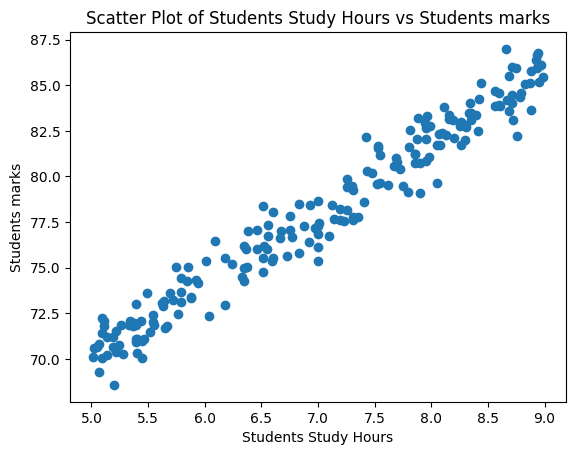

In [14]:
plt.scatter(x =df2.study_hours, y = df2.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Split Dataset (Dependent and Independent Variable)

In [19]:
X = df2.drop('student_marks', axis = 'columns')
y = df2.drop('study_hours', axis = 'columns')

print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [17]:
X.head()

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000


In [18]:
y.head()

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19


## Split Dependent and Independent Variable into Training and Testing Dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [28]:
X_train.head(2)

,study_hours
8,5.19
146,7.99


In [29]:
X_test.head(2)

,study_hours
148,8.30
104,7.23


In [32]:
y_train.head(2)

,student_marks
8,70.66
146,82.75


In [31]:
y_test.head(2)

,student_marks
148,82.02
104,77.55


## Fit Regression Model

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
print(lr.coef_)

[[3.93571802]]


In [37]:
print(lr.intercept_)

[50.44735504]


In [59]:
print( lr.predict([[4]]) )

[[66.1902271]]


In [41]:
# print( lr.predict([4]) )

* ValueError: Expected 2D array, got 1D array instead
* Reshape your data either using array.
* reshape(-1, 1) if your data has a single feature or array.
* reshape(1, -1) if it contains a single sample.

In [60]:
print( lr.predict([[4]])[0] )

[66.1902271]


In [61]:
print( lr.predict([[4]])[0][0] )

66.19022710353573


In [62]:
print( lr.predict([[4]])[0][0].round(2) )

66.19


In [45]:
y_pred  = lr.predict(X_test)
y_pred.shape

(40, 1)

In [48]:
print(y_pred[0:5])

[[83.11381458]
 [78.9025963 ]
 [84.57003024]
 [85.82946001]
 [84.72745896]]


In [49]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=['study_hours', 'student_marks_original','student_marks_predicted'])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [50]:
print( lr.score(X_test, y_test) )

0.9514124242154464


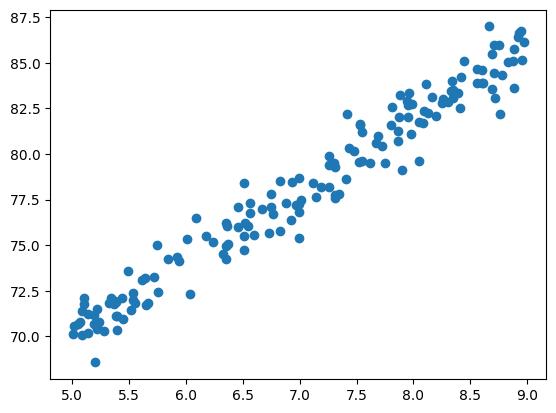

In [52]:
plt.scatter(X_train, y_train);

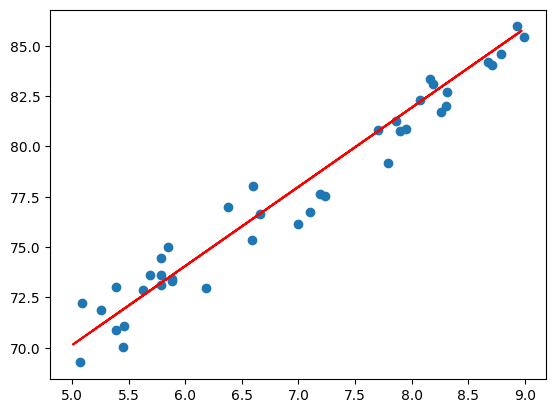

In [54]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='r');

## Save Model (LR)

In [55]:
joblib.dump(lr, 'student_mark_predictor.pkl')

['student_mark_predictor.pkl']

In [56]:
lr_model = joblib.load('student_mark_predictor.pkl')

In [63]:
lr_model.predict([[5]])[0][0]

70.12594512018406

## How to Run Flask File

* First keep flask written python file `app.py` and `student_mark_predictor.pkl` in same folder
* Open terminal like `cmd` or `Jupyter Terminal`
* Change directory to same, where both files are kept together and run below command:
* python app.py
* A below meassage will show:
* Running on http://127.0.0.1:5000
* copy `http://127.0.0.1:5000` and paste it in browser
* keep terminal (cmd or jupyter terminal) open
* whenever terminal will be open, this website will run in browser